In [1]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

fname = "root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleEG/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/100000/2AD46B56-E1CA-CD44-B30D-C57FE1C35D15.root"
#fname = "root://localhost//disk03/opendata_cms/DoubleMuon/Run2016H-UL2016_MiniAODv2_NanoAODv9-v1/NANOAOD/127C2975-1B1C-A046-AABF-62B77E757A86.root"
events = NanoEventsFactory.from_root(
    {fname: "Events"},
    schemaclass=NanoAODSchema,
    metadata={"dataset": "DoubleEG"},
).events()

print("Number of events = ", ak.num(events.Electron, axis=0).compute())

/usr/local/venv/lib/python3.10/site-packages/coffea/nanoevents/methods/candidate.py:11: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


Number of events =  843234


In [3]:
events.Electron.fields

['dEscaleDown',
 'dEscaleUp',
 'dEsigmaDown',
 'dEsigmaUp',
 'deltaEtaSC',
 'dr03EcalRecHitSumEt',
 'dr03HcalDepth1TowerSumEt',
 'dr03TkSumPt',
 'dr03TkSumPtHEEP',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eCorr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'mvaFall17V2Iso',
 'mvaFall17V2noIso',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'phi',
 'pt',
 'r9',
 'scEtOverPt',
 'sieie',
 'sip3d',
 'mvaTTH',
 'charge',
 'cutBased',
 'jetIdx',
 'pdgId',
 'photonIdx',
 'tightCharge',
 'vidNestedWPBitmap',
 'vidNestedWPBitmapHEEP',
 'convVeto',
 'cutBased_HEEP',
 'isPFcand',
 'jetNDauCharged',
 'lostHits',
 'mvaFall17V2Iso_WP80',
 'mvaFall17V2Iso_WP90',
 'mvaFall17V2Iso_WPL',
 'mvaFall17V2noIso_WP80',
 'mvaFall17V2noIso_WP90',
 'mvaFall17V2noIso_WPL',
 'seedGain',
 'cleanmask',
 'jetIdxG',
 'photonIdxG']

In [4]:
(ak.num(events.Electron,axis=1)==2).compute()

<Array [False, True, False, True, ..., False, False, True] type='843234 * bool'>

In [5]:
simple2eEvents = events[ak.num(events.Electron, axis=1) == 2]
#print(simple2eEvents.compute())
print("Number of events with simply 2 electrons = ", ak.num(simple2eEvents.Electron, axis=0).compute())

Number of events with simply 2 electrons =  249869


In [6]:
simple2e = simple2eEvents.Electron[:,0] + simple2eEvents.Electron[:,1]

In [7]:
m2e=simple2e.mass.compute()
m2e

<Array [18.9, 90.8, 77.9, 249, ..., 0.625, 153, 1.28] type='249869 * float32'>

In [8]:
type(m2e)

awkward.highlevel.Array

In [9]:
import hist
import matplotlib.pyplot as plt   #TODO move these up
%matplotlib inline
histogram = hist.Hist.new.Reg(1000, 0, 200,
                              name="m2e", label="m2e [GeV]").Weight()

In [10]:
print(histogram.ndim)
print()

print(histogram.axes)

1

(Regular(1000, 0, 200, name='m2e', label='m2e [GeV]'),)


In [11]:
histogram.fill(m2e=m2e)

Hist(Regular(1000, 0, 200, name='m2e', label='m2e [GeV]'), storage=Weight()) # Sum: WeightedSum(value=231070, variance=231070) (WeightedSum(value=249869, variance=249869) with flow)

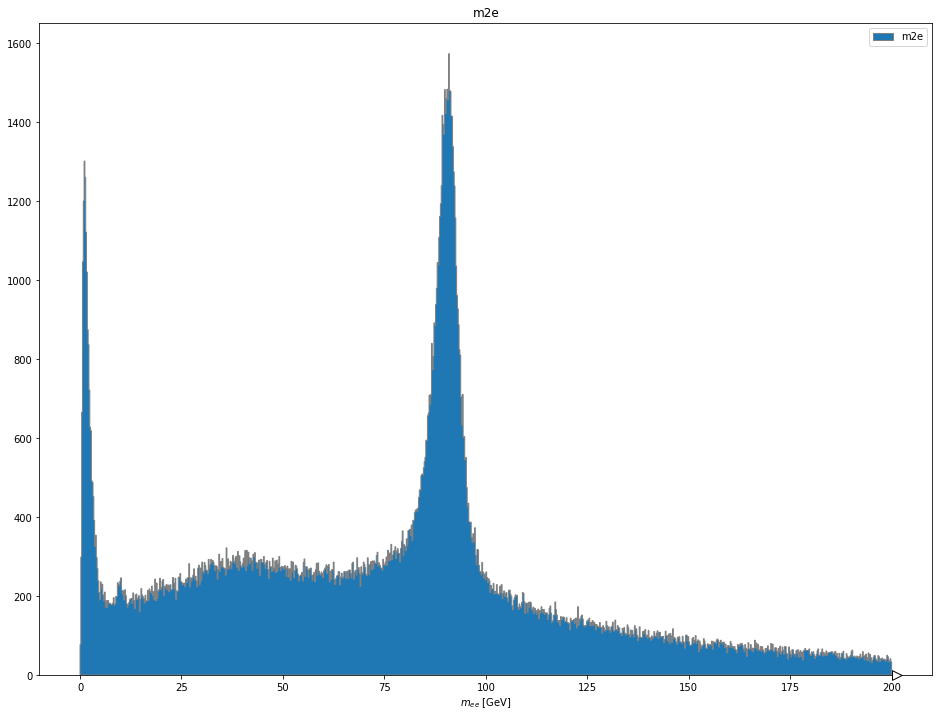

In [12]:
plt.figure(figsize=(16,12))
histogram.plot(histtype="fill", linewidth=1, edgecolor="grey", label='m2e')
plt.legend()
plt.title("m2e")
plt.xlabel("$m_{ee}$ [GeV]");
plt.show()